## A typical RAG workflow



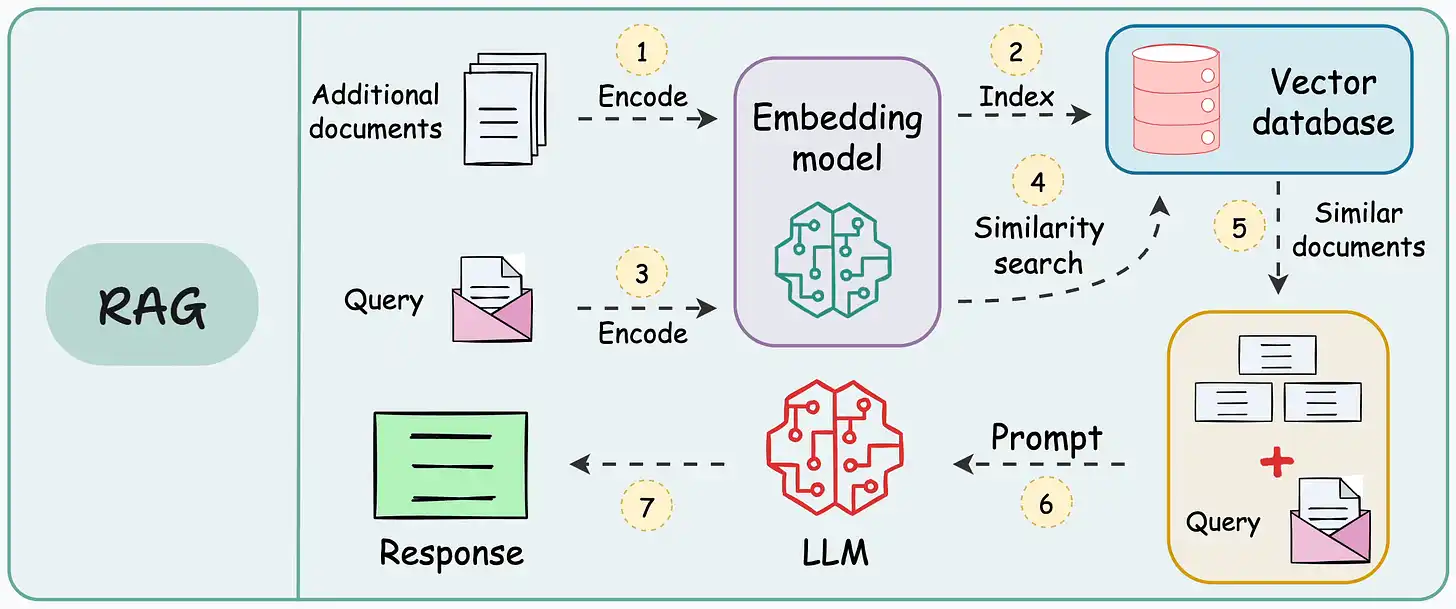

In [2]:
from IPython.display import Image
Image(filename='rag.gif', width = 600, height=400)